In [1]:
#Importamos librerias basicas de DA
import pandas as pd
import numpy as np

In [2]:
#Importamos libreras para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importamos los dos datasets de pobreza y esperanza de vida.
df_life =  pd.read_csv('/Users/guillermogonzalezcervantes/Nuclio Master Data Analytics/TFM/data/life_expectancy.csv')
df_poverty =  pd.read_csv('/Users/guillermogonzalezcervantes/Nuclio Master Data Analytics/TFM/data/poverty_explorer.csv')

In [ ]:
#Revisamos las columnas del df_life
df_life.columns

Index(['Entity', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0'],
      dtype='object')

In [ ]:
#Revisamos las columnas del df_poverty
df_poverty.columns

Index(['Country', 'Year', 'Share below $1 a day', 'Share below $2.15 a day',
       'Share below $3.65 a day', 'Share below $6.85 a day',
       'Share below $10 a day', 'Share below $20 a day',
       'Share below $30 a day', 'Share below $40 a day',
       ...
       'decile8_avg', 'decile9_avg', 'decile10_avg', 'bottom50_share',
       'middle40_share', 'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio',
       'p90_p50_ratio', 'p50_p10_ratio'],
      dtype='object', length=109)

In [ ]:
#Borramos los años que no estan dentro del rango 2000-2019
df_life = df_life[df_life['Year'].between(2000, 2019)]
df_poverty = df_poverty[df_poverty['Year'].between(2000, 2019)]

In [11]:
# Renombrar la columna
df_life = df_life.rename(columns={'Entity': 'Country'})

# Verificar el cambio
print(df_life.columns)

Index(['Country', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0'],
      dtype='object')


In [13]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5140 entries, 50 to 20752
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              5140 non-null   object 
 1   Code                                                 4740 non-null   object 
 2   Year                                                 5140 non-null   int64  
 3   Period life expectancy at birth - Sex: all - Age: 0  5140 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 200.8+ KB


In [14]:
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1805 entries, 1 to 2601
Columns: 109 entries, Country to p50_p10_ratio
dtypes: float64(96), int64(12), object(1)
memory usage: 1.5+ MB


In [ ]:
# Unir los dataframes
df_combined = pd.merge(df_life, df_poverty, on=['Country', 'Year'], how='inner')

# Ver el resultado
print(f"Dataframe combinado: {df_combined.shape}")
display(df_combined.head())

Dataframe combinado: (1524, 111)
   Country Code  Year  Period life expectancy at birth - Sex: all - Age: 0  \
0  Albania  ALB  2002                                            75.8899     
1  Albania  ALB  2005                                            76.6208     
2  Albania  ALB  2008                                            77.6529     
3  Albania  ALB  2012                                            78.0640     
4  Albania  ALB  2014                                            78.4075     

   Share below $1 a day  Share below $2.15 a day  Share below $3.65 a day  \
0              0.046371                 1.092647                11.388324   
1              0.000000                 0.591086                 7.289305   
2              0.000000                 0.199925                 3.902613   
3              0.024101                 0.620691                 4.805442   
4              0.000000                 1.023101                 9.675968   

   Share below $6.85 a day  Share b

In [21]:
display(df_combined.dtypes)

Country                                                 object
Code                                                    object
Year                                                     int64
Period life expectancy at birth - Sex: all - Age: 0    float64
Share below $1 a day                                   float64
                                                        ...   
palma_ratio                                            float64
s80_s20_ratio                                          float64
p90_p10_ratio                                          float64
p90_p50_ratio                                          float64
p50_p10_ratio                                          float64
Length: 111, dtype: object

In [16]:
display(df_combined.head())

,Country,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,ALB,2002,75.8899,0.046371,1.092647,11.388324,52.090965,76.705050,96.52886,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
1,Albania,ALB,2005,76.6208,0.000000,0.591086,7.289305,40.428430,68.453090,95.40567,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
2,Albania,ALB,2008,77.6529,0.000000,0.199925,3.902613,33.431850,62.768870,94.58283,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
3,Albania,ALB,2012,78.0640,0.024101,0.620691,4.805442,36.667750,65.062386,95.52016,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563
4,Albania,ALB,2014,78.4075,0.000000,1.023101,9.675968,38.743828,60.978160,91.58505,...,12.904348,16.358868,25.905287,26.073656,48.382023,1.376215,5.930923,5.188477,2.297305,2.258506


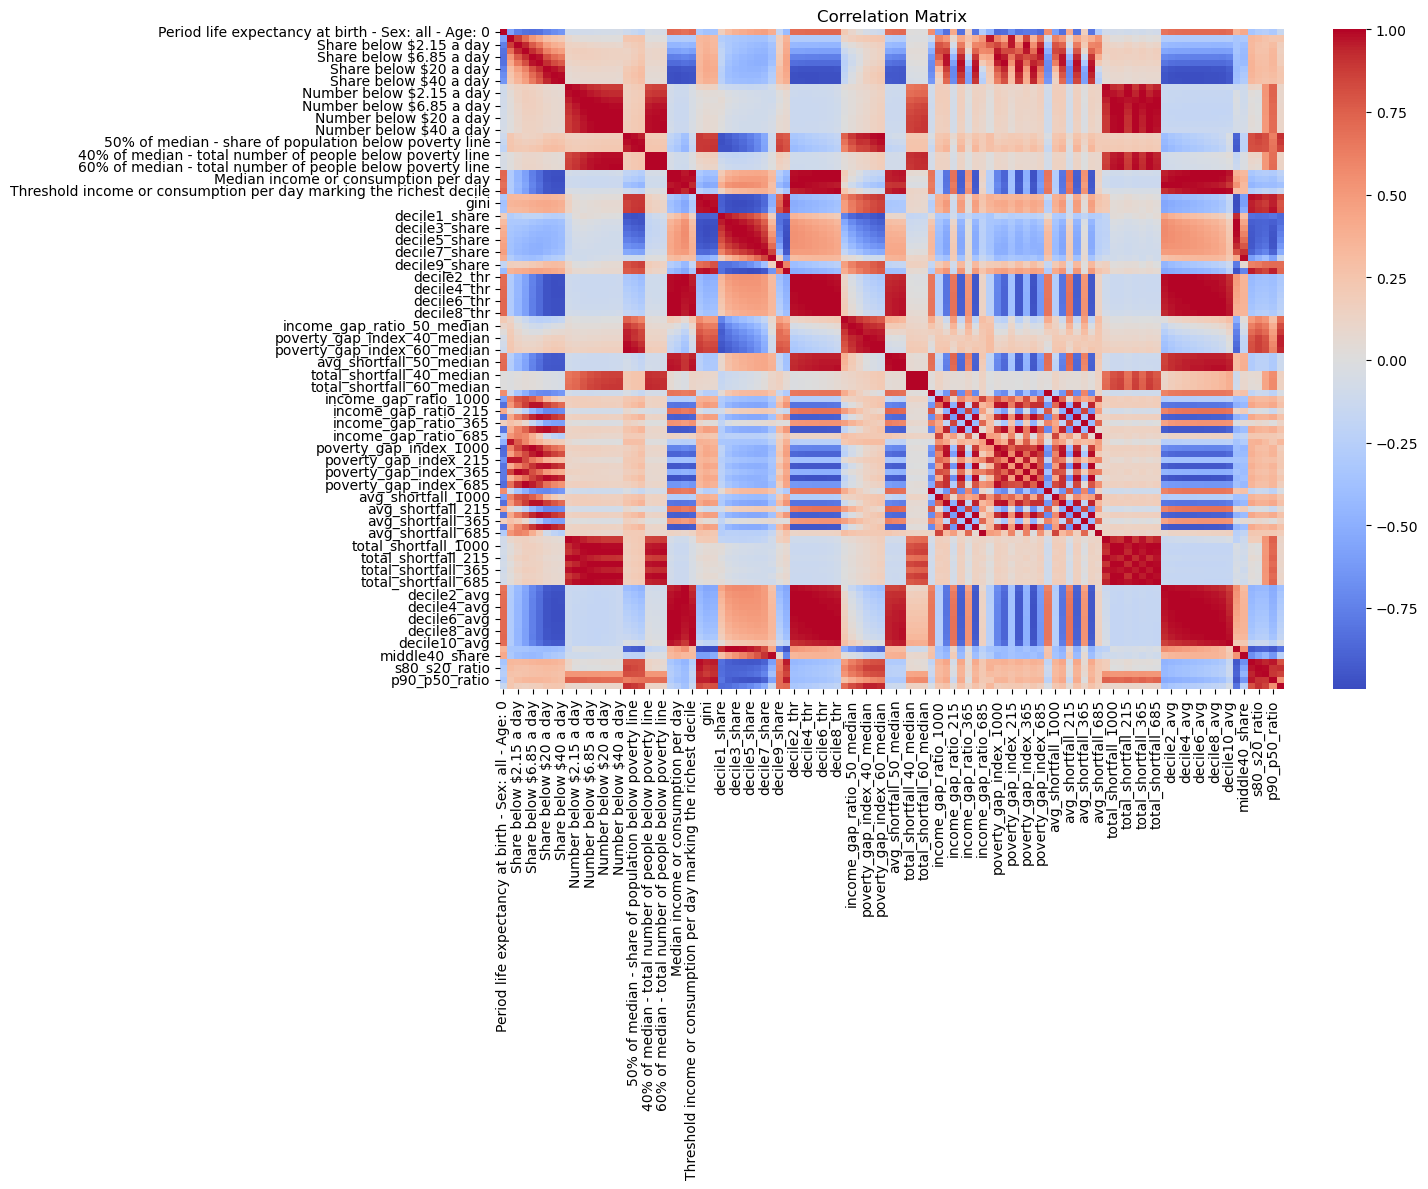

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear matriz de correlación (sin las primeras 3 columnas)
correlation_matrix = df_combined.iloc[:, 3:].corr()

# Visualizar
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

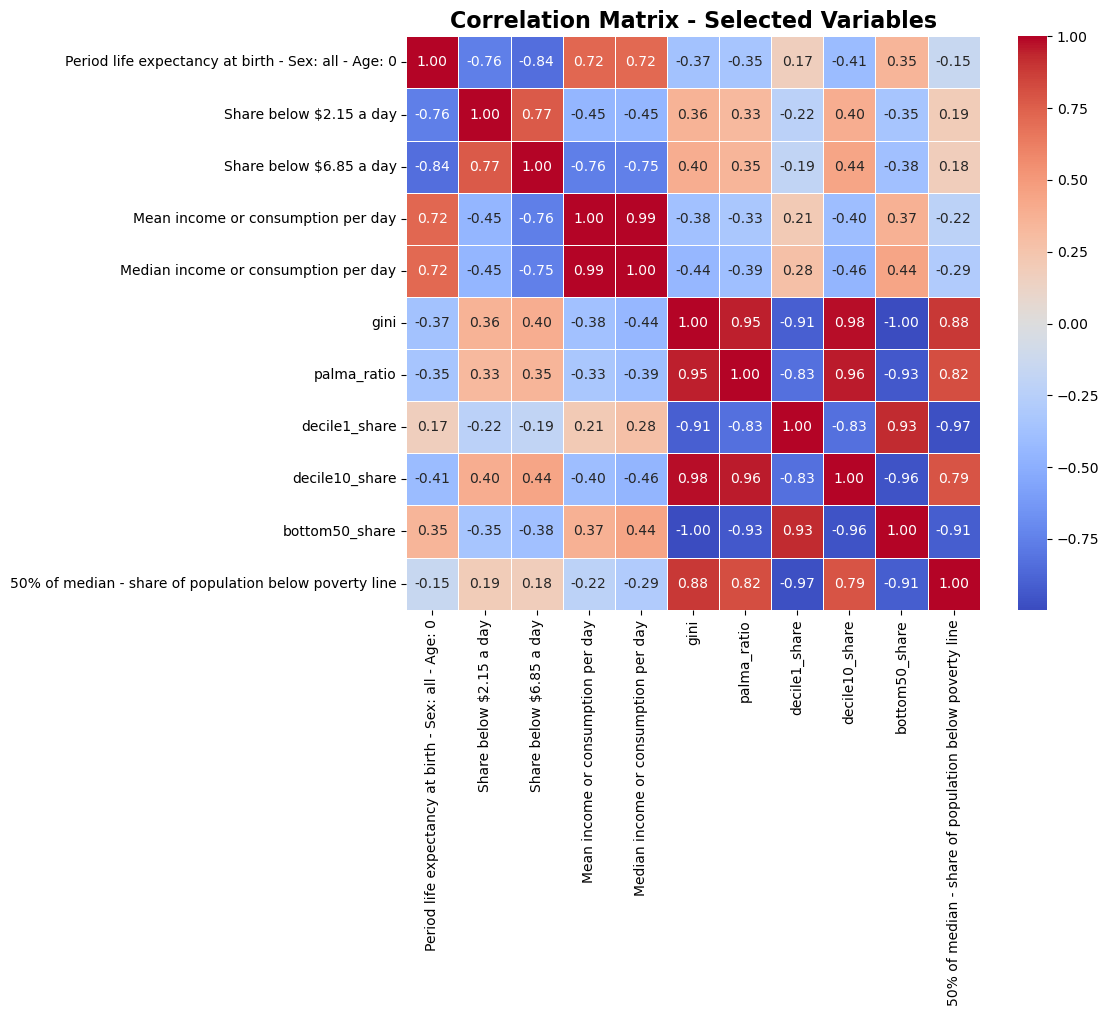


Correlation Matrix:
                                                    Period life expectancy at birth - Sex: all - Age: 0  \
Period life expectancy at birth - Sex: all - Ag...                                           1.000000     
Share below $2.15 a day                                                                     -0.758237     
Share below $6.85 a day                                                                     -0.837436     
Mean income or consumption per day                                                           0.719716     
Median income or consumption per day                                                         0.716432     
gini                                                                                        -0.367202     
palma_ratio                                                                                 -0.346062     
decile1_share                                                                                0.166859     
decile10_share  

In [24]:

# Seleccionar las columnas específicas
selected_columns = [
    'Period life expectancy at birth - Sex: all - Age: 0',
    'Share below $2.15 a day',
    'Share below $6.85 a day',
    'Mean income or consumption per day',
    'Median income or consumption per day',
    'gini',
    'palma_ratio',
    'decile1_share',
    'decile10_share',
    'bottom50_share',
    '50% of median - share of population below poverty line'
]

# Crear dataframe con solo las columnas seleccionadas
df_selected = df_combined[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Selected Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Ver la matriz en consola
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Ver las correlaciones ordenadas (opcional)
print("\n=== Top Correlations ===")
# Obtener solo el triángulo superior para evitar duplicados
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
corr_pairs = correlation_matrix.where(mask).stack().sort_values(ascending=False)
print(corr_pairs.head(10))